In [3]:
path = "/Users/NoNam/OneDrive/Documents/MMO"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [4]:
dataset1 = pd.read_csv(path+'/gapminder_alcohol.csv')

In [5]:


dataset1.head()



,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [6]:
dataset1.shape

(213, 6)

In [7]:
data_features1 = list(zip(
# признаки
[i for i in dataset1.columns],
zip(
    # типы колонок
    [str(i) for i in dataset1.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in dataset1.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features1

[('country', ('object', 0)),
 ('alcconsumption', ('float64', 26)),
 ('incomeperperson', ('float64', 23)),
 ('suicideper100th', ('float64', 22)),
 ('employrate', ('float64', 35)),
 ('urbanrate', ('float64', 10))]

In [8]:


# Колонки с пропусками
columns_with_na = [c for c in dataset1.columns if dataset1[c].isnull().sum() > 0]
data1_cat_new = dataset1[columns_with_na].copy()



In [9]:
# % пропусков
[(c, dataset1[c].isnull().mean()) for c in columns_with_na]

[('alcconsumption', 0.12206572769953052),
 ('incomeperperson', 0.107981220657277),
 ('suicideper100th', 0.10328638497652583),
 ('employrate', 0.1643192488262911),
 ('urbanrate', 0.046948356807511735)]

In [12]:


filtered_columns1 = ['country', 'alcconsumption', 'incomeperperson', 'suicideper100th', 'employrate','urbanrate']
data1 = dataset1[filtered_columns1]
data1.head()



,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [11]:

def impute_column(dataset, column, strategy_param, fill_value_param=None):
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data



In [13]:
all_data, filled_data, missed_data = impute_column(dataset1, 'alcconsumption', 'mean')
all_data

array([ 0.03      ,  7.29      ,  0.69      , 10.17      ,  5.57      ,
        8.17      ,  9.35      , 13.66      ,  6.68941176, 10.21      ,
       12.4       , 13.34      ,  8.65      ,  4.19      ,  0.17      ,
        6.42      , 18.85      , 10.41      ,  5.92      ,  2.08      ,
        6.68941176,  0.54      ,  5.78      ,  9.6       ,  6.97      ,
       10.08      ,  1.86      , 11.4       ,  7.32      ,  9.65      ,
        4.71      ,  7.9       , 10.2       ,  4.98      ,  6.68941176,
        3.17      ,  4.39      ,  8.81      ,  5.56      ,  6.59      ,
        0.28      ,  3.39      ,  4.46      ,  3.23      ,  5.81      ,
        6.47      , 15.        ,  5.12      ,  8.84      , 16.47      ,
       12.02      ,  1.87      ,  8.68      ,  6.28      ,  9.43      ,
        0.32      ,  3.99      ,  6.12      ,  1.64      , 17.24      ,
        4.1       ,  6.68941176,  2.76      , 13.1       , 12.48      ,
        6.68941176,  9.46      ,  3.58      ,  6.66      , 12.14

In [14]:
filled_data

array([6.68941176, 6.68941176, 6.68941176, 6.68941176, 6.68941176,
       6.68941176, 6.68941176, 6.68941176, 6.68941176, 6.68941176,
       6.68941176, 6.68941176, 6.68941176, 6.68941176, 6.68941176,
       6.68941176, 6.68941176, 6.68941176, 6.68941176, 6.68941176,
       6.68941176, 6.68941176, 6.68941176, 6.68941176, 6.68941176,
       6.68941176])

In [15]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [16]:
incomeperperson_cat_new_temp, _, _ = impute_column(data1_cat_new, 'incomeperperson', 'most_frequent')

In [17]:


data1_cat_new['incomeperperson'] = incomeperperson_cat_new_temp



In [18]:
def plot_hist_diff(old_ds, new_ds, cols):
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

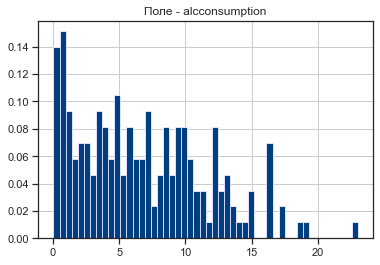

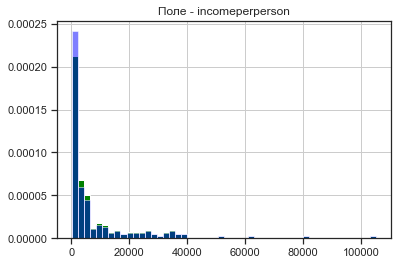

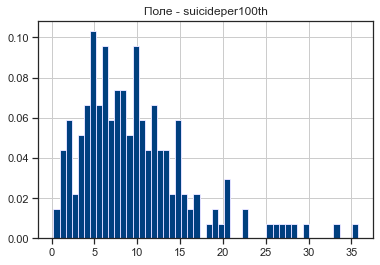

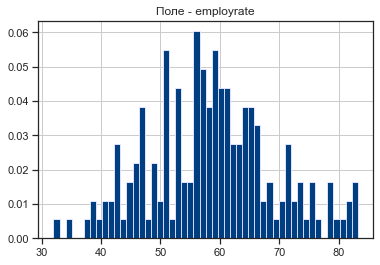

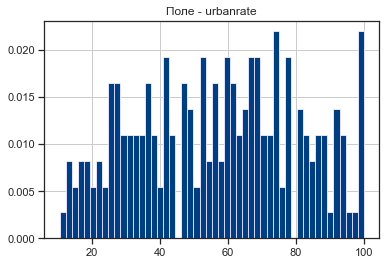

In [19]:


my_data = plot_hist_diff(dataset1, data1_cat_new, columns_with_na)



In [22]:
data3 = pd.read_csv(path+'/Video_Games_Sales_as_at_22_Dec_2016.csv', decimal=".")

In [23]:
data3.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [26]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

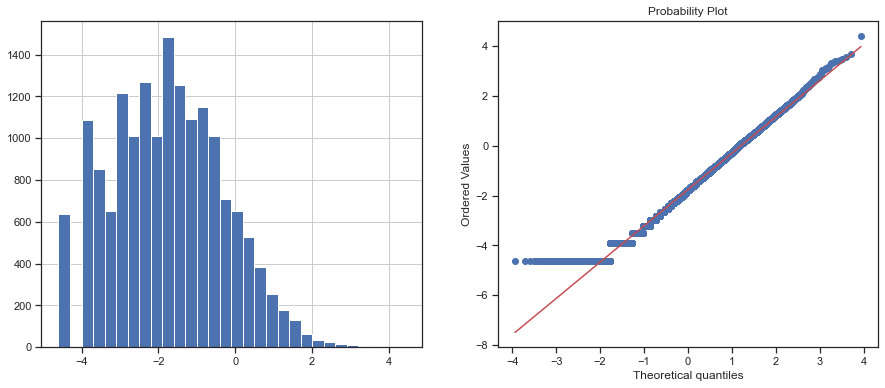

In [27]:

data3['Global_Sales_log'] = np.log(data3['Global_Sales'])
diagnostic_plots(data3, 'Global_Sales_log')